## Assignment #4: Deep Neural Networks - Heart Sound Classification using LSTM with Attention

### Hesam Mousavi 9931155


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from my_io import my_io
from Attention import Attention

#### Read Data

In [ ]:
data_path = "Dataset/wav signals/"
ref = "Dataset/Labels based on .wav file names/"

data = my_io().read_wav_folder(data_path)
data = my_io().Normalize_data(data, -1, 1)

labels = my_io().read_csv_folder(ref)[:, 1]
labels = labels.astype(float)
labels[labels == -1] = 0

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=32
)

#### Build the LSTM network with attention mechanism

In [25]:
num_epochs = 10
learning_rate = 1e-3
input_size = data.shape[1]
batch_size = 20

model = Sequential()
model.add(
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(input_size, 1))
)
model.add(Attention())
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

#### Train the model and plot the loss values

In [27]:
# Check if model trained before
history = my_io().read_file("model.keras")
if history != None:
    model = history
else:
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save("model.keras")


Epoch 1/10
40/40 [==============================] - 156s 4s/step - loss: 0.6441 - accuracy: 0.5888 - val_loss: 0.5613 - val_accuracy: 0.7563
Epoch 2/10
40/40 [==============================] - 151s 4s/step - loss: 0.6013 - accuracy: 0.7030 - val_loss: 0.5599 - val_accuracy: 0.7766
Epoch 3/10
40/40 [==============================] - 150s 4s/step - loss: 0.6081 - accuracy: 0.7005 - val_loss: 0.5664 - val_accuracy: 0.7310
Epoch 4/10
40/40 [==============================] - 151s 4s/step - loss: 0.6062 - accuracy: 0.6878 - val_loss: 0.5648 - val_accuracy: 0.7563
Epoch 5/10
40/40 [==============================] - 149s 4s/step - loss: 0.6067 - accuracy: 0.6929 - val_loss: 0.5623 - val_accuracy: 0.7614
Epoch 6/10
40/40 [==============================] - 148s 4s/step - loss: 0.6023 - accuracy: 0.6916 - val_loss: 0.5633 - val_accuracy: 0.7563
Epoch 7/10
40/40 [==============================] - 149s 4s/step - loss: 0.5918 - accuracy: 0.7183 - val_loss: 0.5485 - val_accuracy: 0.7665
Epoch 8/10
40

#### Plot the loss values

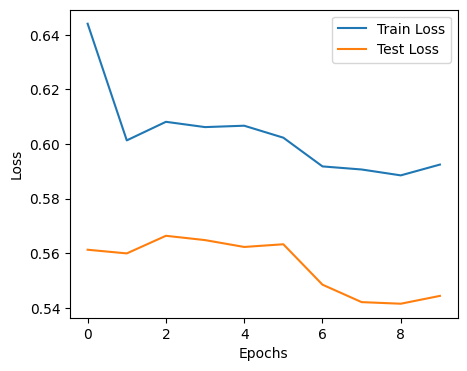

In [28]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Test Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

#### Evaluate the classifier

In [29]:
from tabulate import tabulate

y_pred = model.predict(X_test, verbose=0)
y_pred = np.round(y_pred).flatten()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=True)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table with the results
table = [
    ["Metric", "Value"],
    ["Accuracy", np.round(accuracy * 100, 2)],
    ["Precision", np.round(precision * 100, 2)],
    ["Recall", np.round(recall * 100, 2)],
    ["F1-score", np.round(f1 * 100, 2)]
]

# Print the table using tabulate
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+-----------+---------+
| Metric    |   Value |
+===========+=========+
| Accuracy  |   77.66 |
+-----------+---------+
| Precision |   74.31 |
+-----------+---------+
| Recall    |   83.51 |
+-----------+---------+
| F1-score  |   78.64 |
+-----------+---------+
